## Step 0: Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Step 1: Importing Data

In [3]:
df = pd.read_csv('GOOG.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


### Plotting the value of attribute High with Date

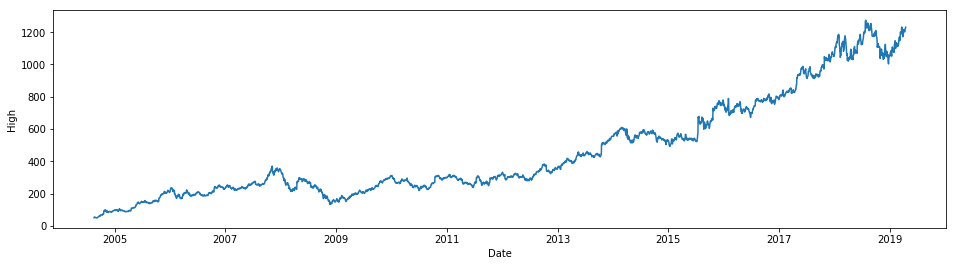

In [4]:
ax, fig = plt.subplots(figsize=(16,4))
sns.lineplot(x = df['Date'], y = df['High'])

In [6]:
df_date = df.set_index('Date')

## Step 2: Train Test Split

In [7]:
X_train = df_date[:'2018']
X_test = df_date['2018':]

In [8]:
X_train.shape, X_test.shape

((3617, 6), (324, 6))

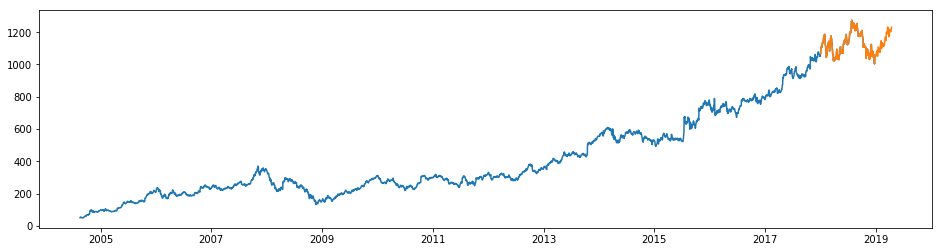

In [9]:
ax, fig = plt.subplots(figsize=(16,4))
plt.plot(X_train['High'])
plt.plot(X_test['High'])

In [10]:
X_train_high = X_train['High']
X_test_high = X_test['High']

In [11]:
X_train_high = np.array(X_train_high)
X_test_high = np.array(X_test_high)

## Step 3: Min Max Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler()
sc.fit(X_train_high.reshape(-1,1))
X_train_scaled = sc.transform(X_train_high.reshape(-1,1))
#X_test_scaled = sc.transform(X_test_high.reshape(-1,1))


## Step 4: Preparing Dataset for Training

In [13]:
window_size = 90

In [14]:
def prepare_data(dataset, window_size):
    X = []
    y = []
    for i in range(window_size,len(dataset)):
        X.append(dataset[i-window_size:i,0])
        y.append(dataset[i,0])

    return np.array(X), np.array(y)

In [15]:
X_train_new, y_train_new = prepare_data(X_train_scaled, window_size)


In [16]:
df_ = df_date[len(df_date) - len(X_test) - window_size:].values
_X_test = np.array(df_[:,1])
_X_test_scaled = sc.transform(_X_test.reshape(-1,1))
X_test_new, y_test_new = prepare_data(_X_test_scaled, window_size)
_X_test_scaled.shape


(414, 1)

In [17]:
X_train_new.shape, y_train_new.shape, X_test_new.shape, y_test_new.shape

((3527, 90), (3527,), (324, 90), (324,))

In [18]:
X_train_new[0] , y_train_new[0]

(array([0.00094209, 0.00298057, 0.0047673 , 0.00400388, 0.00254202,
        0.00252171, 0.00279378, 0.00152277, 0.00079996, 0.00049947,
        0.00025582, 0.        , 0.00010558, 0.00052383, 0.00039389,
        0.00195727, 0.00270851, 0.00416631, 0.00507185, 0.00570939,
        0.00639565, 0.00806461, 0.00758544, 0.00728089, 0.00848286,
        0.00907979, 0.00777224, 0.01041984, 0.01351411, 0.0124096 ,
        0.01319738, 0.01426535, 0.01493943, 0.01490694, 0.01548762,
        0.01540641, 0.01507343, 0.01456584, 0.01697791, 0.01650281,
        0.01776976, 0.01927223, 0.02057166, 0.01918695, 0.01964988,
        0.03184831, 0.03763892, 0.03691204, 0.03564509, 0.03762267,
        0.03988044, 0.03895459, 0.03959619, 0.04055046, 0.03600244,
        0.03271325, 0.02992758, 0.02983013, 0.02874186, 0.03330205,
        0.0357588 , 0.03515781, 0.03156406, 0.0307641 , 0.02951339,
        0.02771043, 0.02751551, 0.02805559, 0.03064633, 0.03179146,
        0.03297719, 0.0329975 , 0.03279446, 0.03

In [19]:
X_train_new = np.reshape(X_train_new , newshape=( len(X_train)-window_size , window_size, 1))
y_train_new = np.reshape(y_train_new , newshape=( len(X_train)-window_size , 1))
X_test_new = np.reshape(X_test_new , newshape=( len(X_test)  , window_size, 1))
y_test_new = np.reshape(y_test_new , newshape=( len(X_test)  ,1))

## Step 5: Modelling Data

In [20]:
from tensorflow.python.keras.datasets import imdb
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM, SimpleRNN, Dropout, Flatten
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.optimizers import Adam

In [50]:
model = Sequential()

model.add(SimpleRNN(50, return_sequences= True , input_shape = (window_size,1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(50, return_sequences= True ))
model.add(Dropout(0.5))

model.add(SimpleRNN(50 ))

model.add(Dense(1, activation='linear'))

In [51]:
model.compile(loss='mse', optimizer='Adam')

In [52]:
model_history = model.fit(X_train_new, y_train_new, epochs=20, batch_size=64)

Epoch 1/20
3527/3527 [==============================] - 18s 5ms/step - loss: 0.1269
Epoch 2/20
3527/3527 [==============================] - 15s 4ms/step - loss: 0.0147
Epoch 3/20
3527/3527 [==============================] - 14s 4ms/step - loss: 0.0085
Epoch 4/20
3527/3527 [==============================] - 15s 4ms/step - loss: 0.0059
Epoch 5/20
3527/3527 [==============================] - 15s 4ms/step - loss: 0.0049
Epoch 6/20
3527/3527 [==============================] - 15s 4ms/step - loss: 0.0037
Epoch 7/20
3527/3527 [==============================] - 15s 4ms/step - loss: 0.0035
Epoch 8/20
3527/3527 [==============================] - 15s 4ms/step - loss: 0.0032
Epoch 9/20
3527/3527 [==============================] - 15s 4ms/step - loss: 0.0033
Epoch 10/20
3527/3527 [==============================] - 15s 4ms/step - loss: 0.0035
Epoch 11/20
3527/3527 [==============================] - 15s 4ms/step - loss: 0.0024
Epoch 12/20
3527/3527 [==============================] - 16s 4ms/step - lo

In [53]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 90, 50)            2600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 90, 50)            5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 12,751
Trainable params: 12,751
Non-trainable params: 0
_________________________________________________________________
None


## Step 6: Saving Model

In [54]:
model.save_weights('model_v1.h5')

## Step 7: Visualizing the Losses

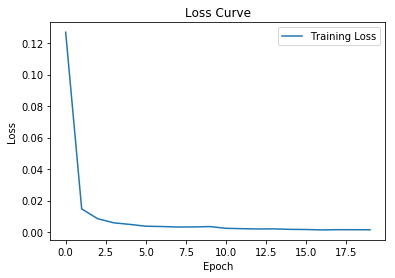

In [55]:

tra_loss = model_history.history['loss']

plt.plot(tra_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend([ 'Training Loss'])
plt.show()

## Step 8: Testing Your Neural Network

In [56]:
y_pred = model.predict(X_test_new)

In [57]:
y_pred = sc.inverse_transform(y_pred)

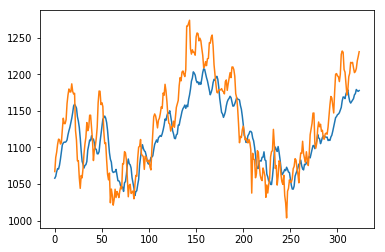

In [62]:
plt.plot(y_pred)
plt.plot( sc.inverse_transform(y_test_new))

In [63]:
rms=np.sqrt(np.mean(np.power((y_pred-sc.inverse_transform(y_test_new)),2)))

In [64]:
rms

36.41453646000072